# Data Analysis of 45 Ice Cream Stores for 2010-2012

One of the Ice Cream Vendor stored the weekly sale records of their 45 stores around the country for three consecutive years. All the stores are divided in 5 different regions of country with different Temerature and Unemployment count. Good analysis of this data can allow the management to make decisions that can help the company maximize profits as well as avoid losses by observing trends in the historical data collected from sales in each store. This data contains various indicators that can be used to determine the performance of the stores by comparing various parameters. This data shows patterns and trends that can be followed across the years to discover various patterns. However, looking at this data with the naked eye is tedious and impossible task. This is even more difficult considering that the data is split into various files, each with only a part of the information required. Therefore, an analysis tool is needed to merge the files and generate various summaries that would make it easy to analyze the data. The store therefore decided to implement an analysis system that would collect data from the ordering system, merge in into a useful format and do various analysis.

### Below we have done Exploratory Data Analysis using Data Analysis and Machine Learning libraries in Python. First step is to import libraries and modules using inbuilt import() function. The libraries and their descriptions are as below: 

Pandas: High performance Data Analysis and Data Structure tool in python

NumPy: Library with high-level mathematical functions, powerful array object and matrices

Matplotlib: Library for plotting objects, pyplot module of this library provide MATLAB like interface

Scikit Learn: Machine learning library with every kind of ML algorithms for classification, clustering and regression.

In [8]:
import pandas as pd           # adding pandas library as variable pd
import matplotlib.pyplot as plt                      # adding pyplot from matplotlib as variable plt
import numpy as np                  # import of numpy library
import sklearn.linear_model as linear                  # import of linear model from sklearn library
from sklearn import metrics as mt                       # import of metrics from sklearn

### Read the data and merge data from different files to one DataFrame object

Three files containing data related to Regions of Stores, Temperature & Unemployment Count of Stores and Weekly Sales of Stores is available in comma seperated file formats respectively. Read these files using read_csv() function of Pandas library and to merge them over a common attribute, i.e. Store ID, using merge function of the same library.

In [9]:
region=pd.read_csv('Region.csv')            # read the csv file with data for Regions using pandas
store_details=pd.read_csv('StoreDetails.csv')            # read the csv file with data for Stores using pandas
weekly_sales=pd.read_csv('Weekly_Sales.csv')            # read the csv file with data for Sales using pandas
data=pd.merge(region,store_details)            # merge the data of regions and stores using pandas. This is an innerjoin
data=pd.merge(data,weekly_sales)            # merge the data of earlier merged data and sales using pandas.

## DateTime Formatting for Time Series Analysis

Convert the Date Series of the Data Frame to DataTime Format from string. Later copy that series and save that as a numpy array. Assign integer number corresponding to each Region Name. Add that numpy array to Data Frame as a DataFrame Series.

In [10]:
data['Date']=pd.to_datetime(data['Date'])             # conversion of Date column to datetime format from string
digits=np.array(data['Region'].tolist())               # creation of a numpy array With each region name

for i in range(len(digits)):                         # loop to convert the character elements of numpy array to corresponding integer number
    if(digits[i]=='A'):
        digits[i]=1
    elif(digits[i]=='B'):
        digits[i]=2
    elif(digits[i]=='C'):
        digits[i]=3
    elif(digits[i]=='D'):
        digits[i]=4
    elif(digits[i]=='E'):
        digits[i]=5   
data['Region_number']=digits                # Addition of column to dataframe with the numbers against each region

## Indexing of DataFrame

Replace the current index of DataFrame with the Date Series, that we converted to DateTime Format earlier and remove the series from the DataFrame to resist duplicacy of any series.

In [11]:
data.index=data['Date']
del data.index.name
del data['Date']

In [12]:
data.head()

,Store,Region,Temperature,Unemployment,Weekly_Sales,Region_number
2010-05-02,1,A,42.31,8.106,24924.50,1
2010-12-02,1,A,38.51,8.106,46039.49,1
2010-02-19,1,A,39.93,8.106,41595.55,1
2010-02-26,1,A,46.63,8.106,19403.54,1
2010-05-03,1,A,46.50,8.106,21827.90,1


## Data Manipulation

Manipulation of data using different functions of pandas DataFrame Object.

DataFrame.index

DataFrame.index.year

DataFrame.groupby()

In [22]:
store_1_2010=data[(data.index.year==2010)&(data['Store']==1)]   #Sales data of Store 1 in year 2010
store_1_2011=data[((data.index.year==2011))&(data['Store']==1)]   #Sales data of Store 1 in year 2011
store_1_2012=data[((data.index.year==2012))&(data['Store']==1)]   #Sales data of Store 1 in year 2012
store_1=data[data['Store']==1]                                 # store 1
store_wise=data.groupby('Store')['Weekly_Sales'].sum()     #overall sale record for stores
store_wise_2010=data[(data.index.year==2010)].groupby('Store')['Weekly_Sales'].sum()
store_wise_2011=data[(data.index.year==2011)].groupby('Store')['Weekly_Sales'].sum()
store_wise_2012=data[(data.index.year==2012)].groupby('Store')['Weekly_Sales'].sum()
yearly_sale=data.groupby(data.index.year)['Weekly_Sales'].sum()    # Yearly grouped sale data
region_sale=data.groupby('Region')['Weekly_Sales'].sum()           # sale data grouped on the basis of region
temperature_detail=data.groupby('Store')['Temperature'].max()       # Maximumm temperature grouped by Store
temp_in_2010=data[data.index.year==2010].groupby('Store')['Temperature'].max()     # maximum temperature of stores in 2010
temp_in_2011=data[data.index.year==2011].groupby('Store')['Temperature'].max()     # maximum temperature of stores in 2011
temp_in_2012=data[data.index.year==2012].groupby('Store')['Temperature'].max()     # maximum temperature of stores in 2012

### Store wise sales for three years

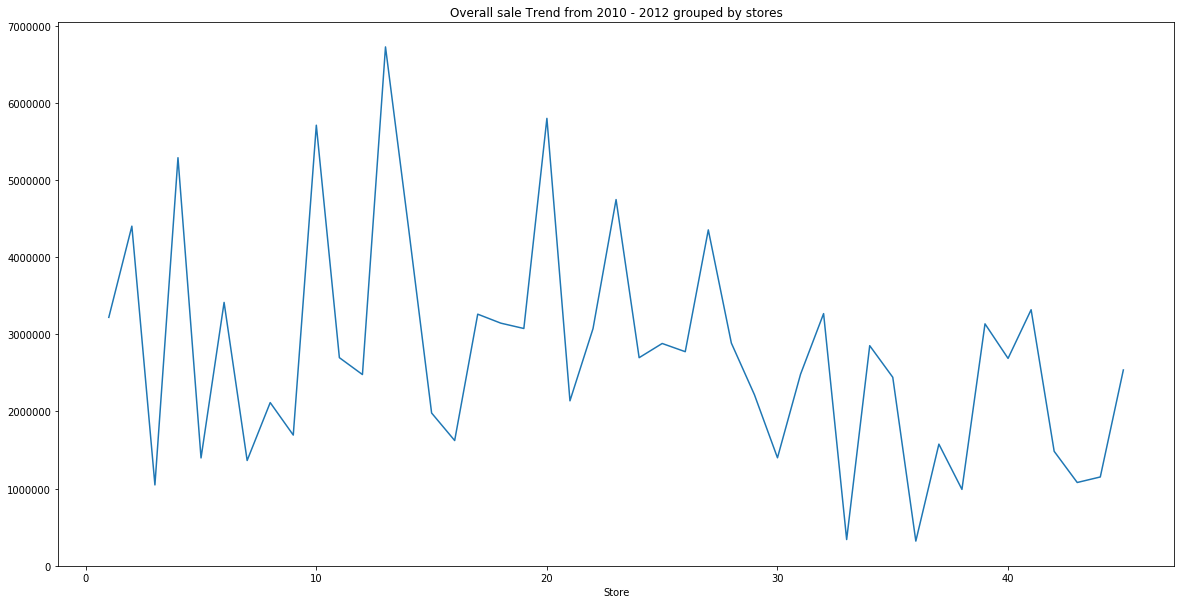

In [23]:
plt.figure(figsize=(20,10))
store_wise.plot()          # graph for store wise
plt.title('Overall sale Trend from 2010 - 2012 grouped by stores')
plt.show()

### Store wise sales for year 2010

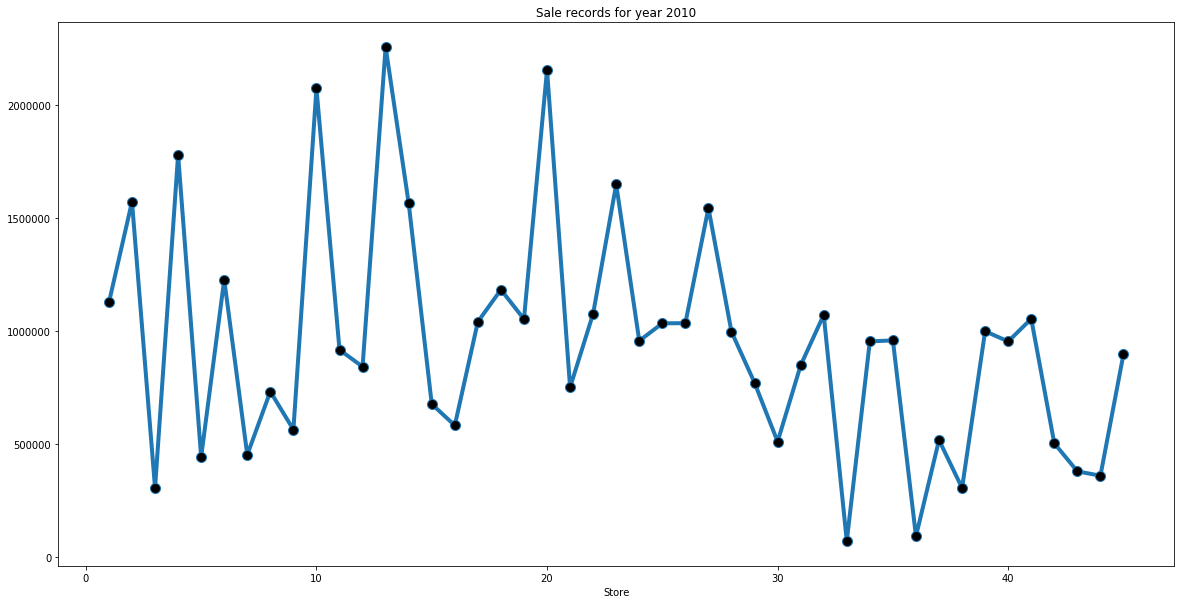

In [9]:
plt.figure(figsize=(20,10))
store_wise_2010.plot(style='-', marker='o', markerfacecolor='black',markersize=10,linewidth=4)
plt.title('Sale records for year 2010')
plt.show()

### Store wise sales for year 2011

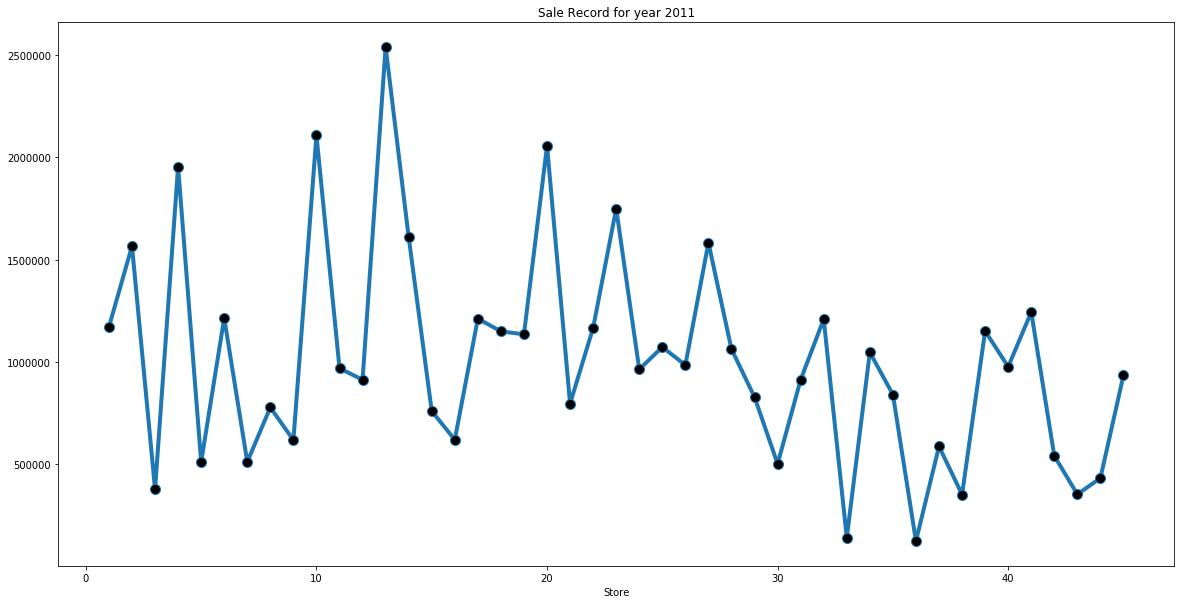

In [10]:
plt.figure(figsize=(20,10))
store_wise_2011.plot(style='-', marker='o', markerfacecolor='black',markersize=10,linewidth=4)
plt.title('Sale Record for year 2011')
plt.show()

### Comparison of Store wise sales for three years

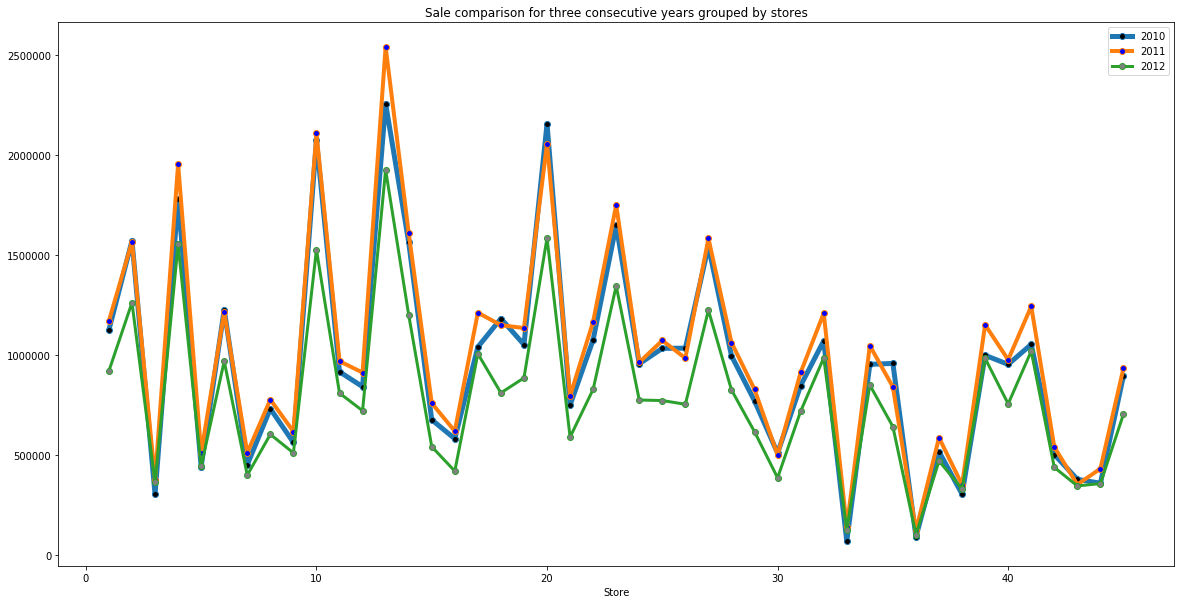

In [11]:
plt.figure(figsize=(20,10))
store_wise_2010.plot(label='2010',style='-', marker='o', markerfacecolor='black',linewidth=5)
store_wise_2011.plot(label='2011',style='-', marker='o', markerfacecolor='blue',linewidth=4)
store_wise_2012.plot(label='2012',style='-', marker='o', markerfacecolor='grey',linewidth=3)
plt.legend()
plt.title('Sale comparison for three consecutive years grouped by stores')
plt.show()          # Comparison of three consecutive years for stores

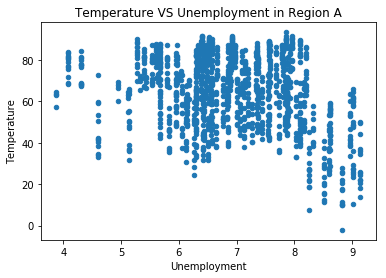

In [12]:
data[data['Region']=='A'].plot.scatter(x='Unemployment',y='Temperature')
plt.title('Temperature VS Unemployment in Region A')
plt.show()                                # scatter plot for Temperature vs Unemployment

### Comparison of Sales based on Unemployment in Region A

In [13]:
print(store_1.resample('Y').mean())
print(store_1.resample('M').mean())
print(store_1.resample('W').mean())

            Store  Temperature  Unemployment  Weekly_Sales
2010-12-31      1    67.497500      7.860729  23465.598542
2011-12-31      1    67.658269      7.817231  22529.823077
2012-12-31      1    69.994419      7.080907  21430.363953
            Store  Temperature  Unemployment  Weekly_Sales
2010-01-31      1    71.890000      7.838000  20094.190000
2010-02-28      1    57.435000      7.951750  33647.665000
2010-03-31      1    59.127500      7.959250  21781.297500
2010-04-30      1    69.815000      7.808000  16963.877500
2010-05-31      1    63.201667      7.912333  21711.915000
2010-06-30      1    85.203333      7.801000  16684.466667
2010-07-31      1    80.225000      7.792250  16326.762500
2010-08-31      1    80.700000      7.799750  17614.607500
2010-09-30      1    77.347500      7.792250  24531.605000
2010-10-31      1    66.340000      7.827800  28170.940000
2010-11-30      1    65.453333      7.828000  18336.916667
2010-12-31      1    51.085000      7.927333  34433.4900

In [14]:
data[data.index.year==2010].shape

(2160, 6)

### Comparison of Sales based on Temperature in Region A

<Figure size 1440x720 with 0 Axes>

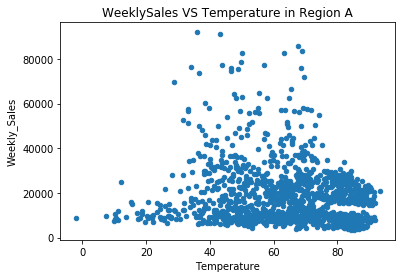

In [17]:
plt.figure(figsize=(20,10))
data[data['Region']=='A'].plot.scatter(x='Temperature',y='Weekly_Sales')
plt.title('WeeklySales VS Temperature in Region A')
plt.show()            # scatter plot for Temperature vs Weekly Sales

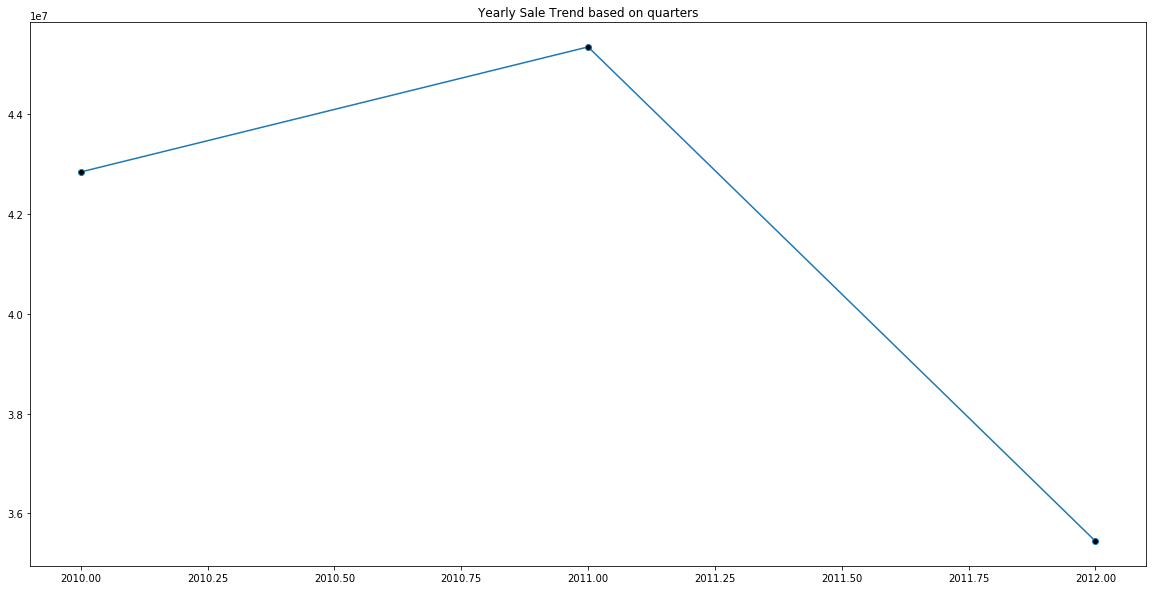

In [18]:
plt.figure(figsize=(20,10))
yearly_sale.plot(style='-', marker='o', markerfacecolor='black')
plt.title('Yearly Sale Trend based on quarters')
plt.show()          # Line graph for Yearly Sale Trend

### Yearly Report of Sales

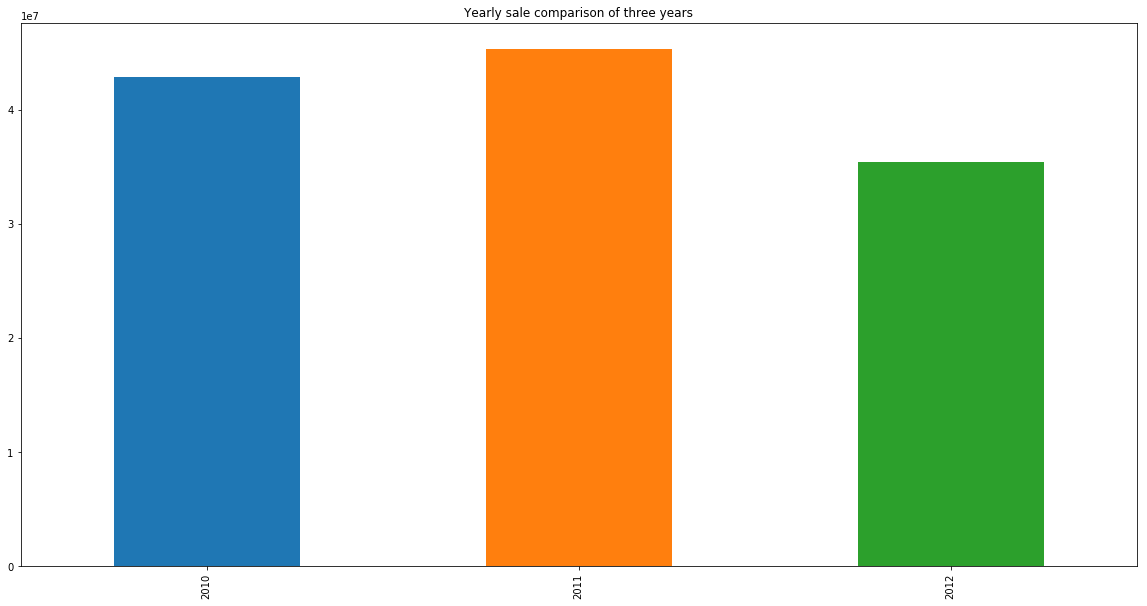

In [19]:
plt.figure(figsize=(20,10))
yearly_sale.plot.bar()
plt.title('Yearly sale comparison of three years')
plt.show()                               # Yearly Sale Bar Graph

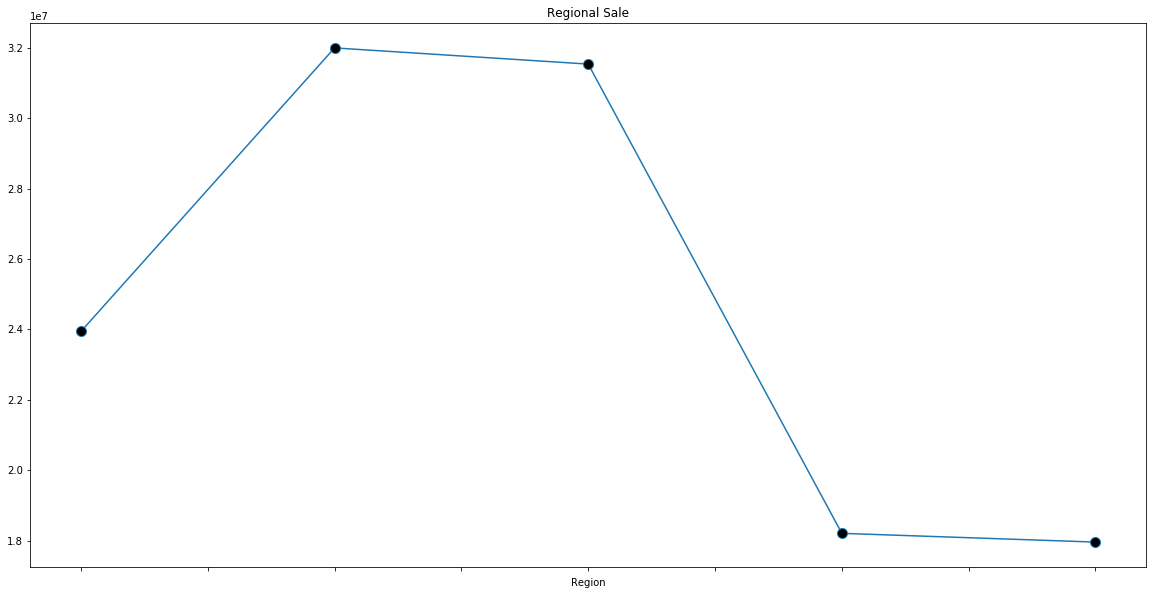

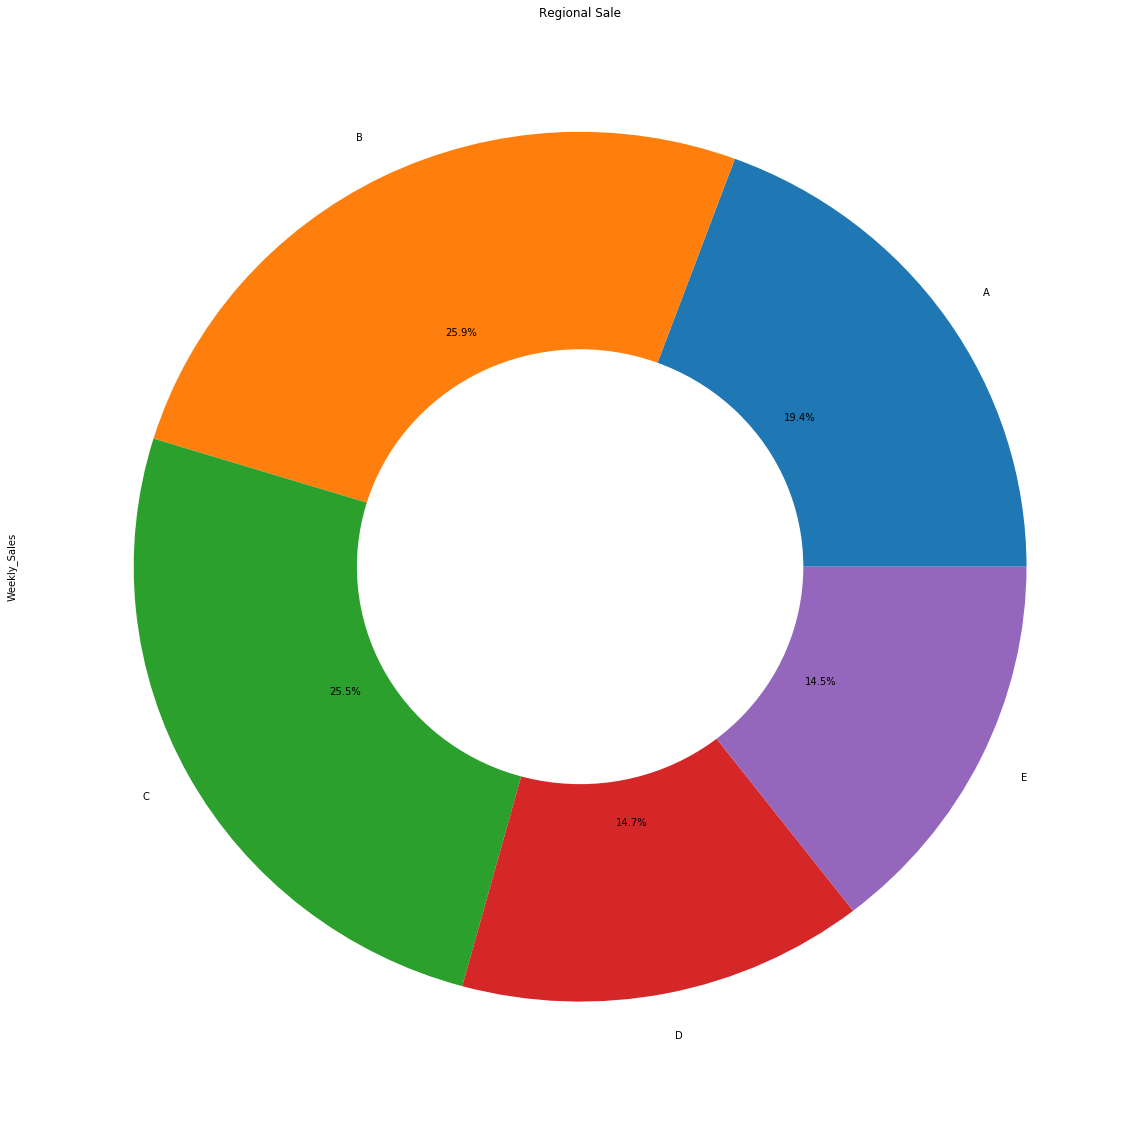

In [20]:
plt.figure(figsize=(20,10))
region_sale.plot(style='-', marker='o', markerfacecolor='black',markersize=10)
plt.title('Regional Sale')
plt.show()                # Region based Sales Graph
plt.figure(figsize=(20,20))
region_sale.plot.pie(autopct='%1.1f%%')
plt.title('Regional Sale')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

### Temperature data for all stores

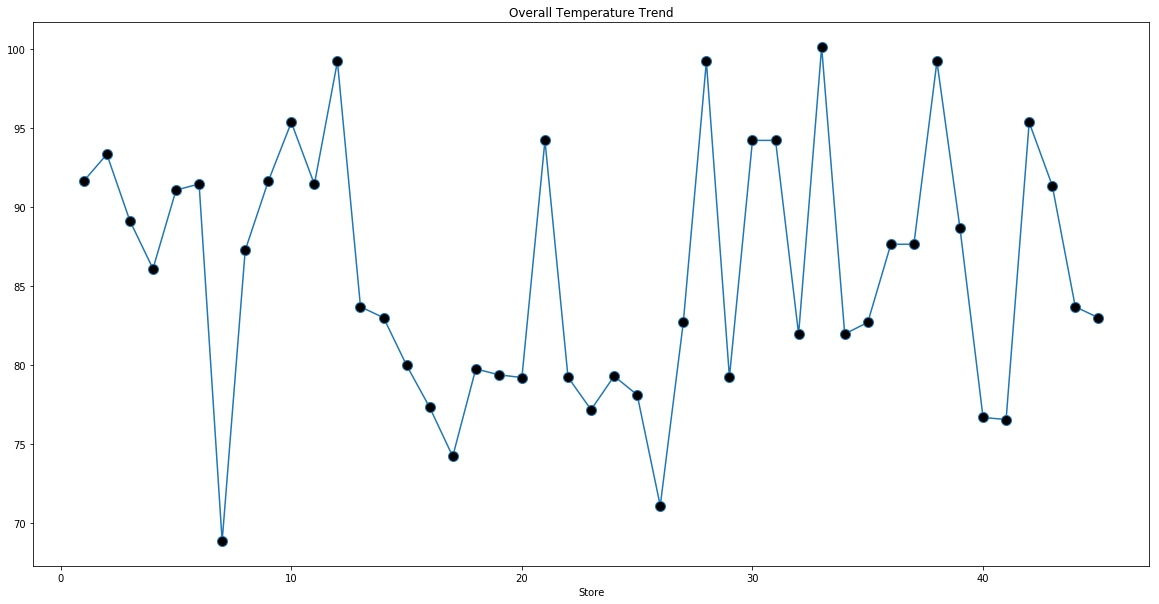

In [21]:
plt.figure(figsize=(20,10))
temperature_detail.plot(style='-', marker='o', markerfacecolor='black',markersize=10)
plt.title('Overall Temperature Trend')
plt.show()        # Temperature Trend among Stores

### Comparison of Temperature data for all stores in three years

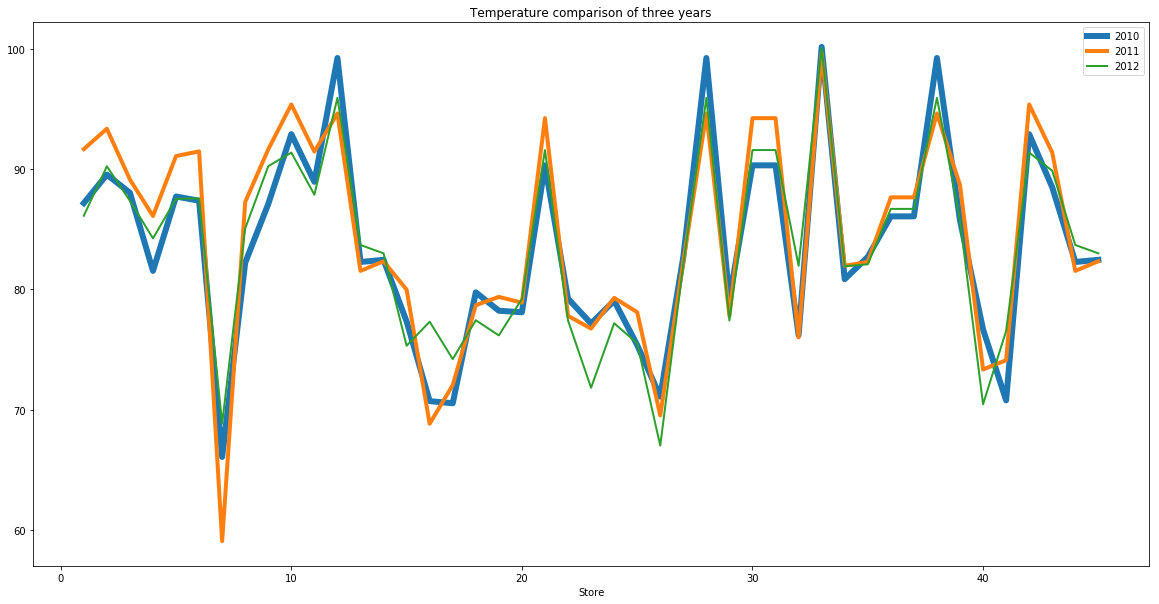

In [22]:
plt.figure(figsize=(20,10))
temp_in_2010.plot(label='2010', linewidth=6)
temp_in_2011.plot(label='2011', linewidth=4)
temp_in_2012.plot(label='2012', linewidth=2)
plt.legend()
plt.title('Temperature comparison of three years')
plt.show()                                # Temperature Trend Among All the stores

### Sales in three years

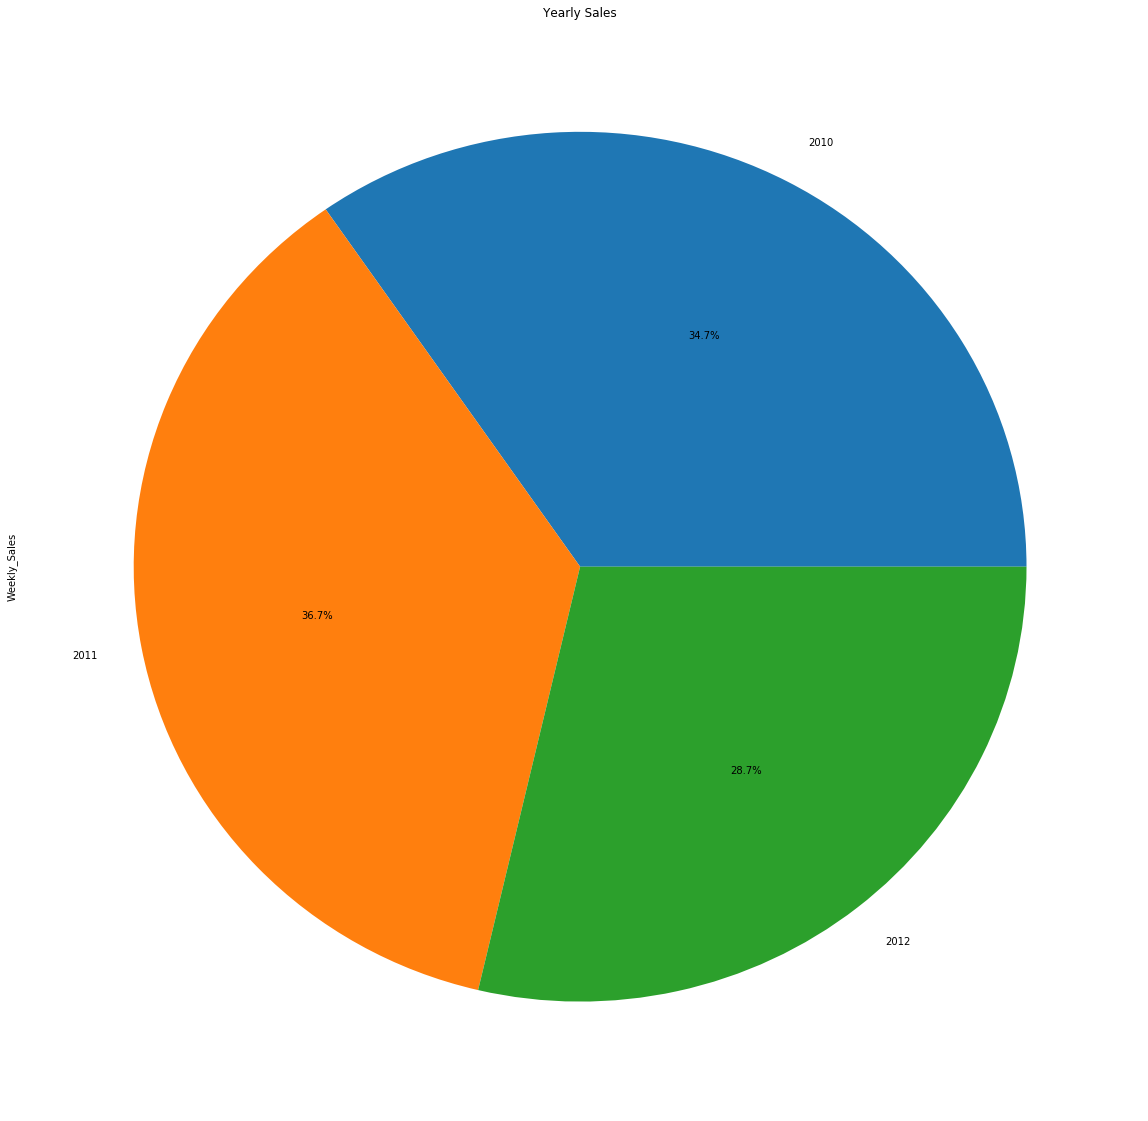

In [23]:
plt.figure(figsize=(20,20))
yearly_sale.plot.pie(autopct='%1.1f%%')
plt.title('Yearly Sales')
plt.show()                 # Yearly Sales division

### Region wise Sales in three years

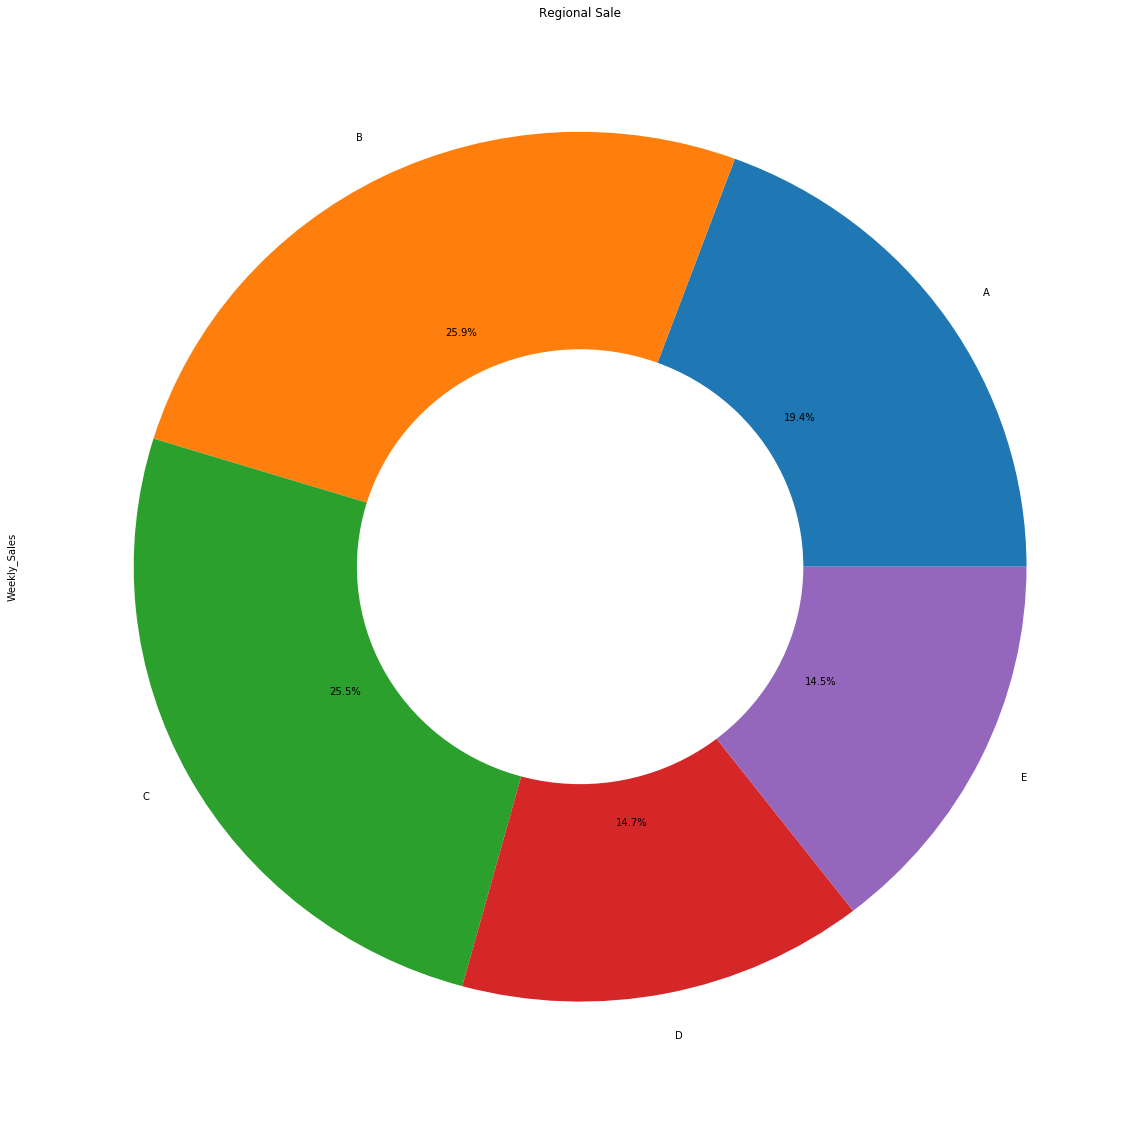

In [24]:
plt.figure(figsize=(20,20))
region_sale.plot.pie(autopct='%1.1f%%')
plt.title('Regional Sale')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()          # Regional Sale division

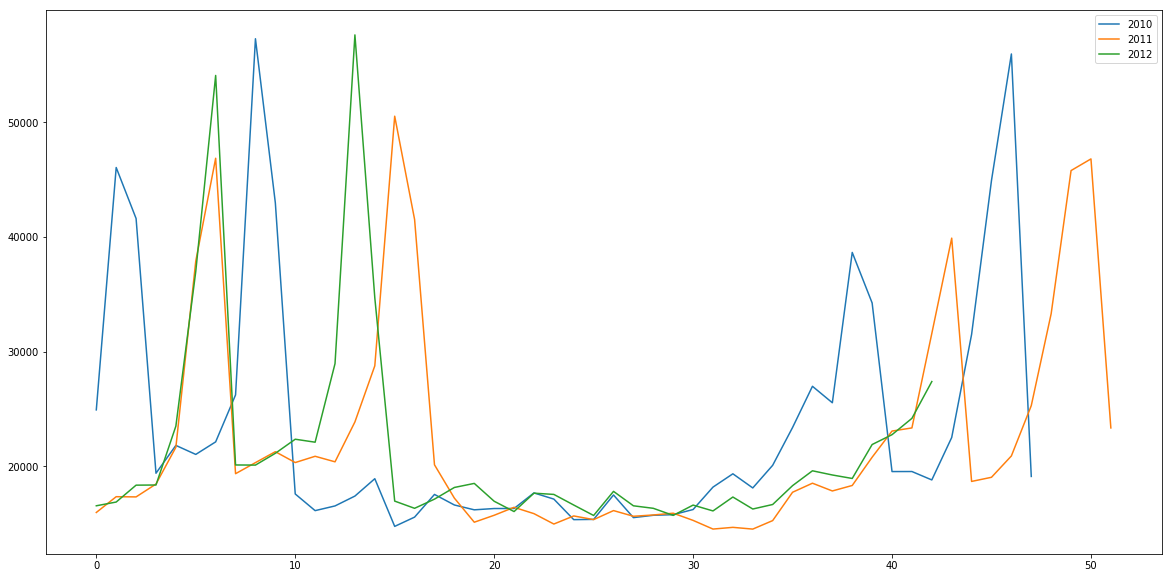

In [26]:
plt.figure(figsize=(20,10))
plt.plot(range(48),store_1_2010['Weekly_Sales'],label='2010')
plt.plot(range(52),store_1_2011['Weekly_Sales'],label='2011')
plt.plot(range(43),store_1_2012['Weekly_Sales'],label='2012')
plt.legend()
plt.show()


In [48]:
linear=linear.LinearRegression()
train=pd.DataFrame();                          # declaration of empty dataset to be used for training of model
train['Temperature']=store_1['Temperature'][:100]
train['Unemployment']=store_1['Unemployment'][:100]
train['Region_number']=store_1['Region_number'][:100]
test=pd.DataFrame();
test['Temperature']=store_1['Temperature'][100:]
test['Unemployment']=store_1['Unemployment'][100:]
test['Region_number']=store_1['Region_number'][100:]
linear.fit(train,store_1['Weekly_Sales'][:100])
linear.score(train,store_1['Weekly_Sales'][:100])
train['Weekly_Sales']=store_1['Weekly_Sales'][:100]
test['test_result']=linear.predict(test)

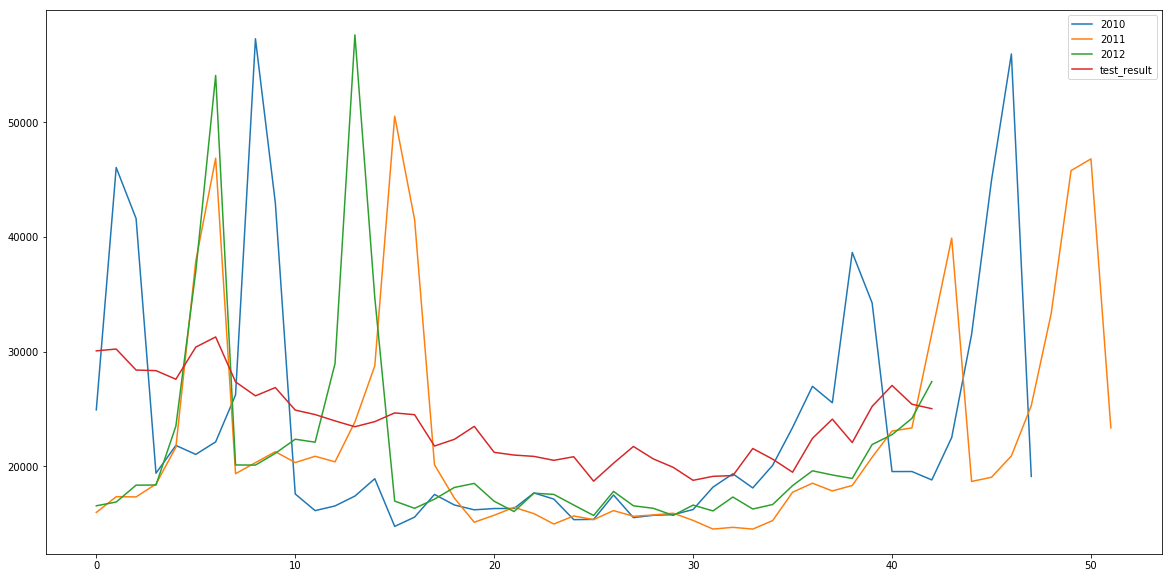

In [49]:
plt.figure(figsize=(20,10))
plt.plot(range(48),store_1_2010['Weekly_Sales'],label='2010')
plt.plot(range(52),store_1_2011['Weekly_Sales'],label='2011')
plt.plot(range(43),store_1_2012['Weekly_Sales'],label='2012')
plt.plot(range(43),test['test_result'])
plt.legend()
plt.show()


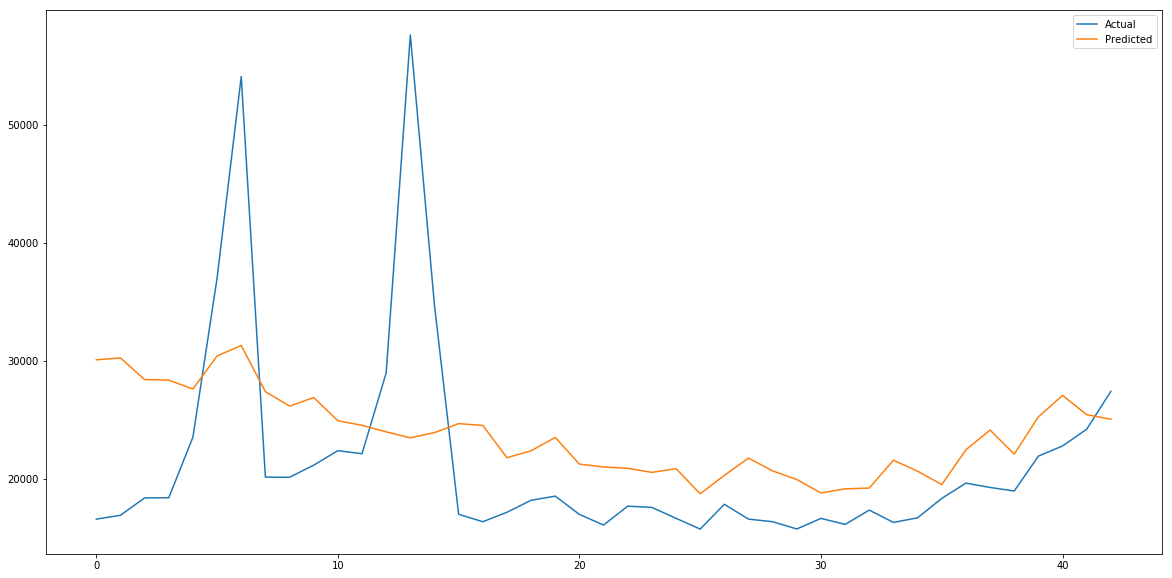

In [50]:
plt.figure(figsize=(20,10))
plt.plot(range(43),store_1_2012['Weekly_Sales'],label='Actual')
plt.plot(range(43),test['test_result'],label='Predicted')
plt.legend()
plt.show()

In [30]:
data.columns

Index(['Store', 'Region', 'Temperature', 'Unemployment', 'Weekly_Sales',
       'Region_number'],
      dtype='object')

In [31]:
X=data[['Store','Temperature','Unemployment','Region_number']].values
Y=data["Weekly_Sales"].values

from sklearn.model_selection import RepeatedKFold
kf=RepeatedKFold(n_splits=2,n_repeats=100)
y_pred=Y.copy()

kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train = Y[train_index]
    linear.fit(X_train,Y_train)
    y_pred[test_index]=linear.predict(X_test)
a=(abs(y_pred-Y))
print(a.min())
print(a.max())
print(a.mean())
print(a.var())
print(linear.score(X_train,Y_train))

2.9897011664215825
143270.6443160405
8875.03923925803
111587173.33311625
0.16584279871380925


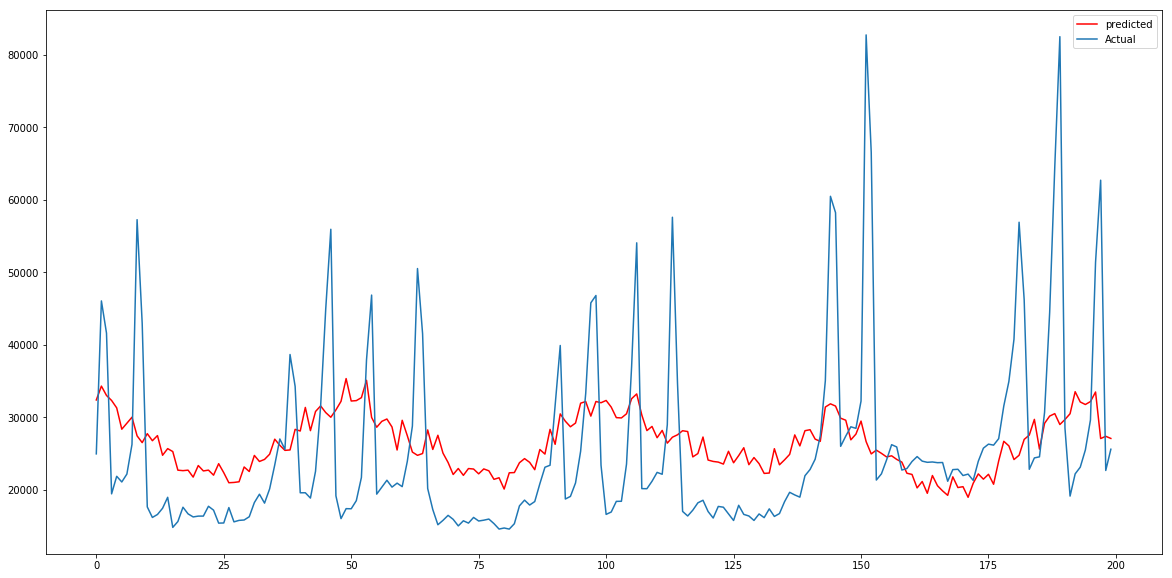

In [32]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:200],color='r', label='predicted')
plt.plot(Y[:200], label='Actual')
plt.legend()
plt.show()

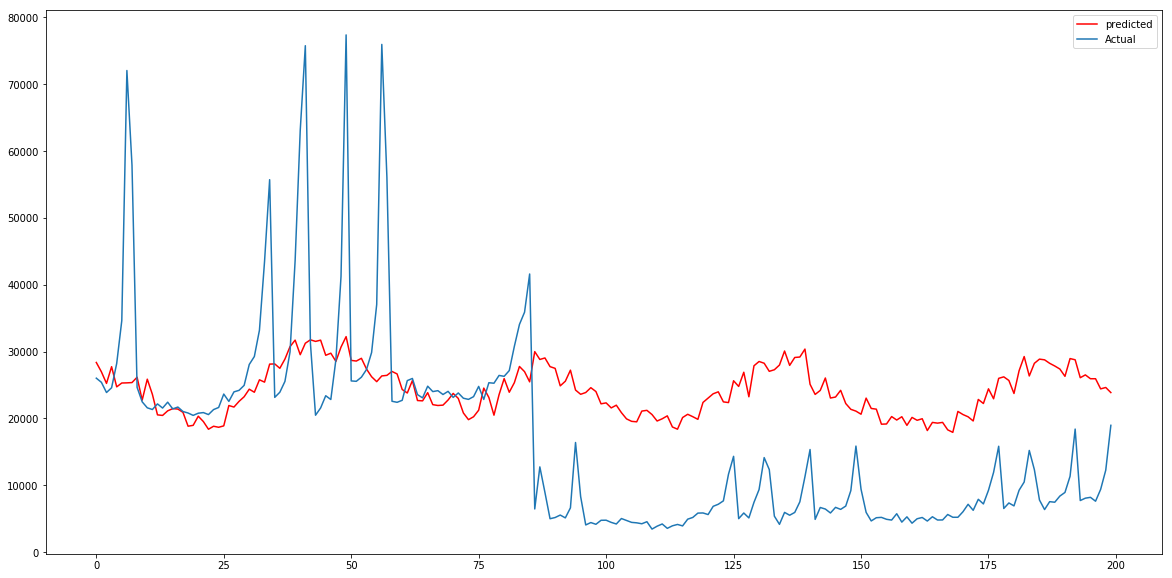

In [33]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[200:400],color='r', label='predicted')
plt.plot(Y[200:400], label='Actual')
plt.legend()
plt.show()

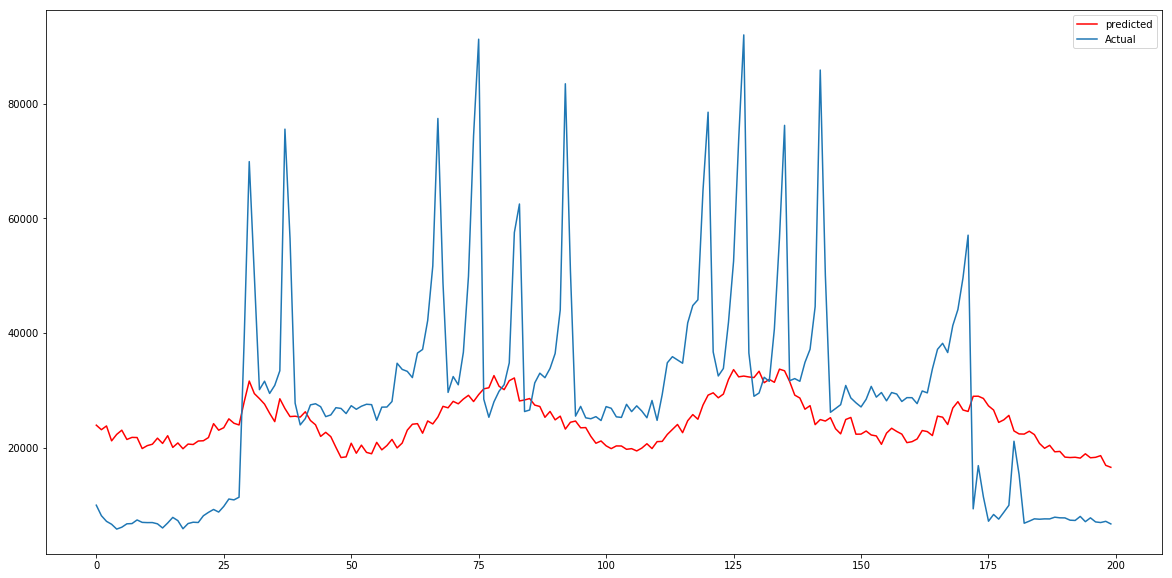

In [34]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[400:600],color='r', label='predicted')
plt.plot(Y[400:600], label='Actual')
plt.legend()
plt.show()

In [35]:
X=data[['Store','Temperature','Unemployment','Region_number']].values
Y=data["Weekly_Sales"].values

from sklearn.model_selection import KFold
kf=KFold(n_splits=2000,shuffle=True)
y_pred=Y.copy()

kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train = Y[train_index]
    linear.fit(X_train,Y_train)
    y_pred[test_index]=linear.predict(X_test)
a=(abs(y_pred-Y))
print(a.min())
print(a.max())
print(a.mean())
print(a.var())
print(linear.score(X_train,Y_train))

0.4513910435798607
143324.65363533606
8866.52515126916
111612134.90057404
0.16705192805824975


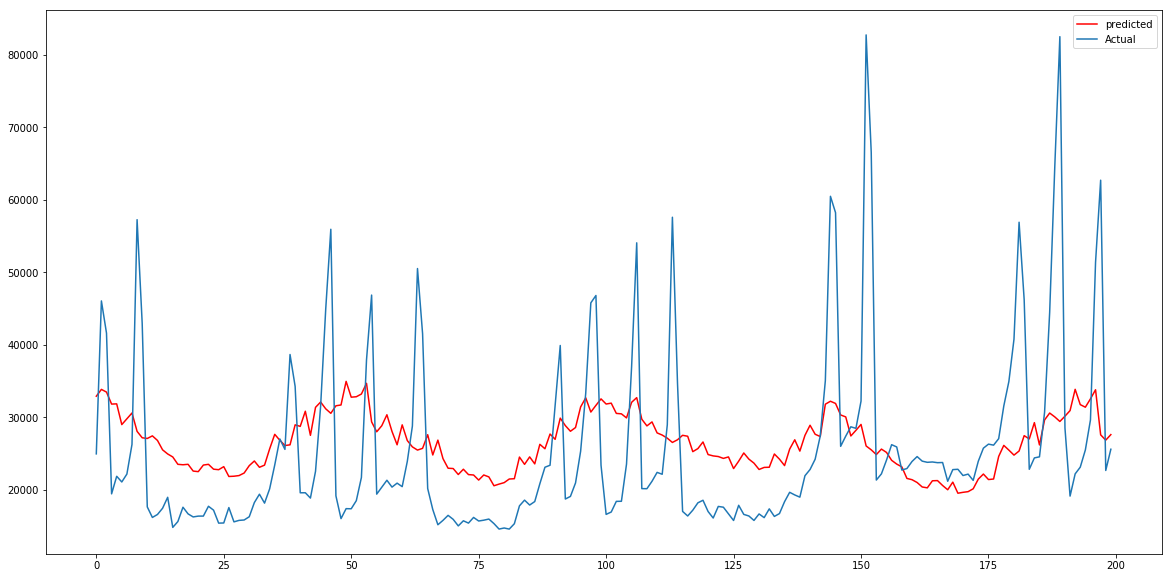

In [36]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:200],color='r', label='predicted')
plt.plot(Y[:200], label='Actual')
plt.legend()
plt.show()

In [37]:
X=data[['Store','Temperature','Unemployment','Region_number']].values
Y=data["Weekly_Sales"].values

from sklearn.model_selection import LeaveOneOut
kf=LeaveOneOut()
y_pred=Y.copy()

kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train = Y[train_index]
    linear.fit(X_train,Y_train)
    y_pred[test_index]=linear.predict(X_test)
a=(abs(y_pred-Y))
print(a.min())
print(a.max())
print(a.mean())
print(a.var())
print(linear.score(X_train,Y_train))

1.7755039072999352
143315.22795966407
8866.410969007758
111613625.7589101
0.1671854303099839


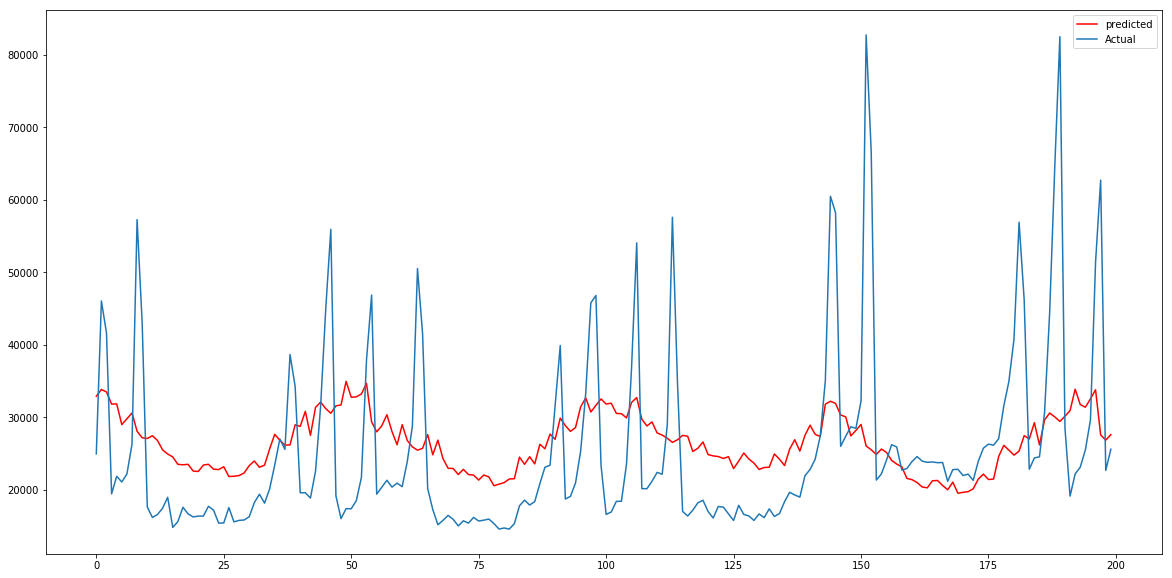

In [38]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:200],color='r', label='predicted')
plt.plot(Y[:200], label='Actual')
plt.legend()
plt.show()

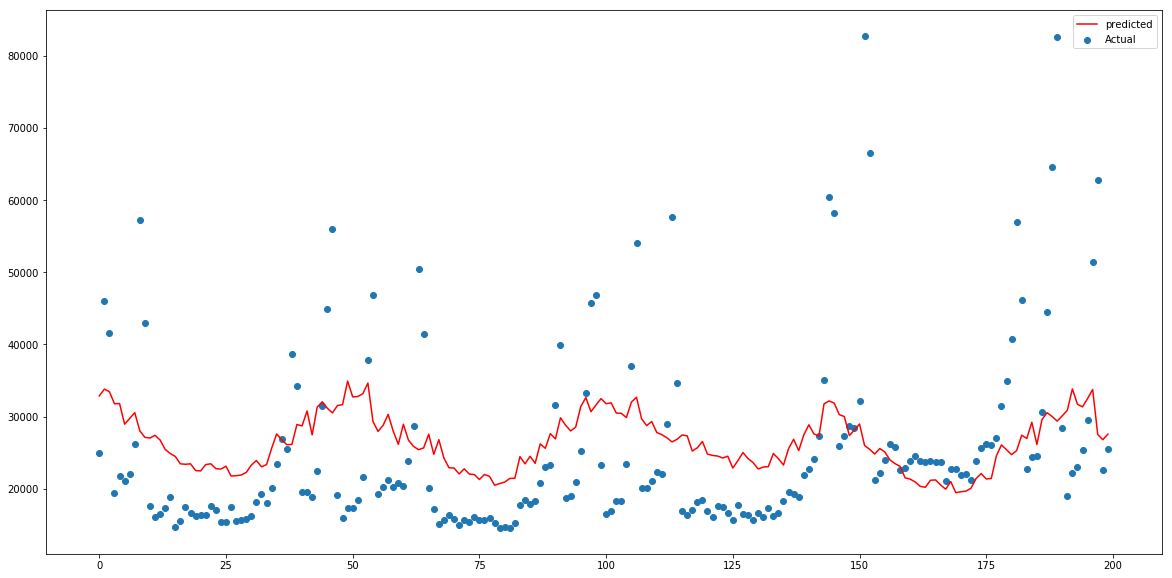

In [39]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:200],color='r', label='predicted')
plt.scatter(range(200),Y[:200],marker='o', label='Actual')
plt.legend()
plt.show()

In [40]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

X=data[['Store','Temperature','Unemployment','Region_number']].values
Y=data["Weekly_Sales"].values

kf=TimeSeriesSplit(n_splits=len(X)-1)
y_pred=Y.copy()

kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train = Y[train_index]
    linear.fit(X_train,Y_train)
    y_pred[test_index]=linear.predict(X_test)
a=(abs(y_pred-Y))
print(a.min(),',',y_pred.min())
print(a.max(),',',y_pred.max())
print(a.mean(),',',y_pred.mean())
print(a.var(),',',y_pred.var())
print(linear.score(X_train,Y_train))
print(metrics.mean_absolute_error(Y, y_pred))
print(metrics.mean_squared_error(Y, y_pred))
print(np.sqrt(metrics.mean_squared_error(Y, y_pred)))

0.0 , -15539.705744955601
135594.3514136421 , 55261.60722660599
9470.737758226218 , 21289.87540288991
102931037.15354863 , 87852143.78834848
0.1671854303099839
9470.737758226218
192625910.83864042
13878.973695437297


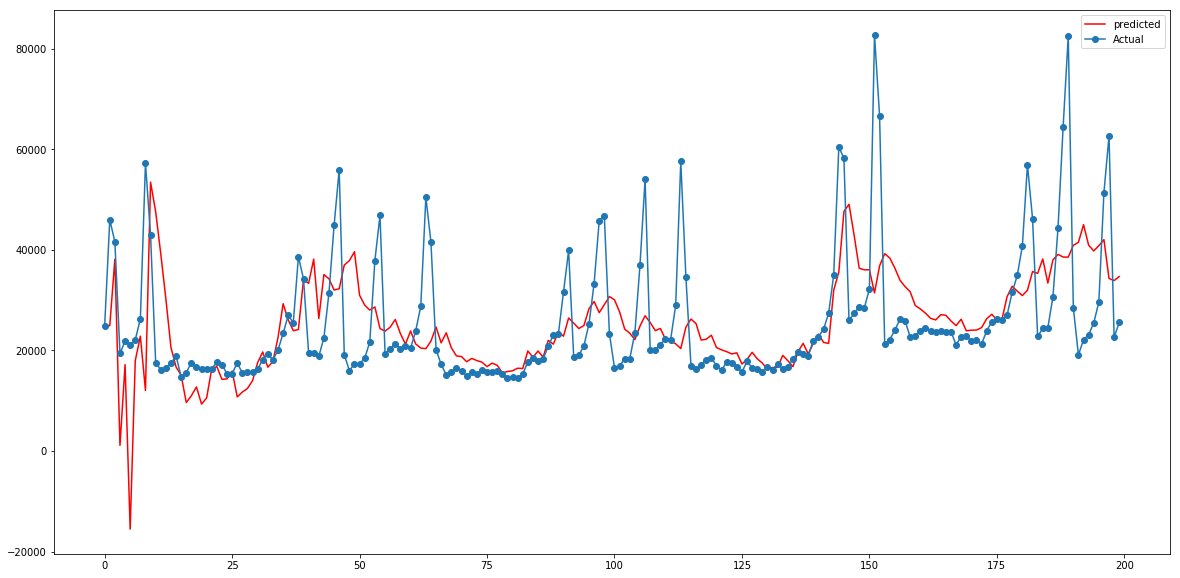

In [41]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:200],color='r', label='predicted')
plt.plot(range(200),Y[:200],marker='o', label='Actual')
plt.legend()
plt.show()

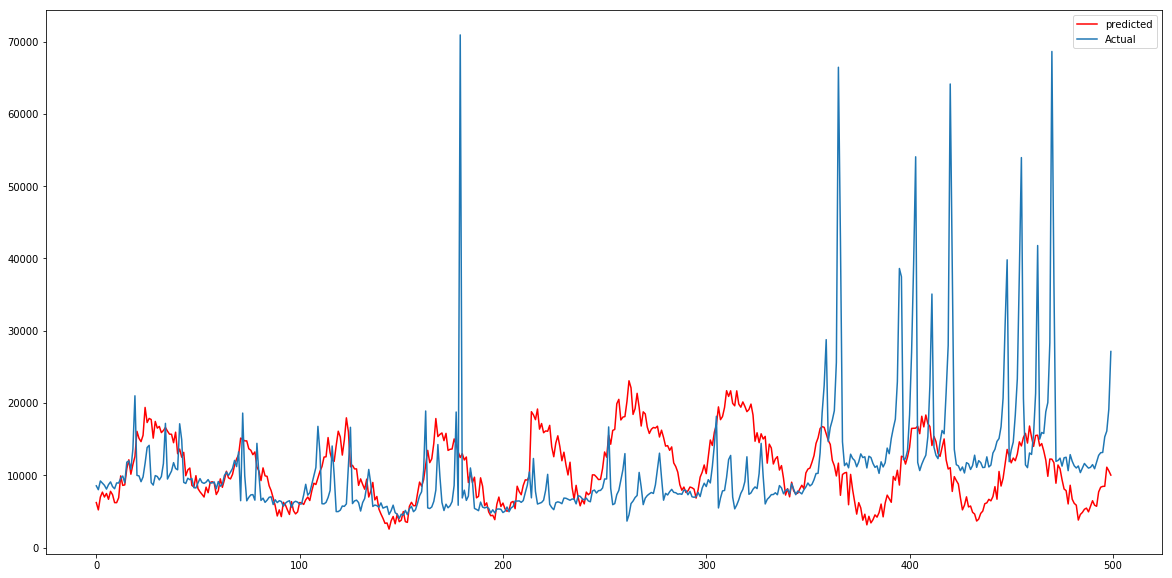

In [42]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[-500:],color='r', label='predicted')
plt.plot(Y[-500:], label='Actual')
plt.legend()
plt.show()

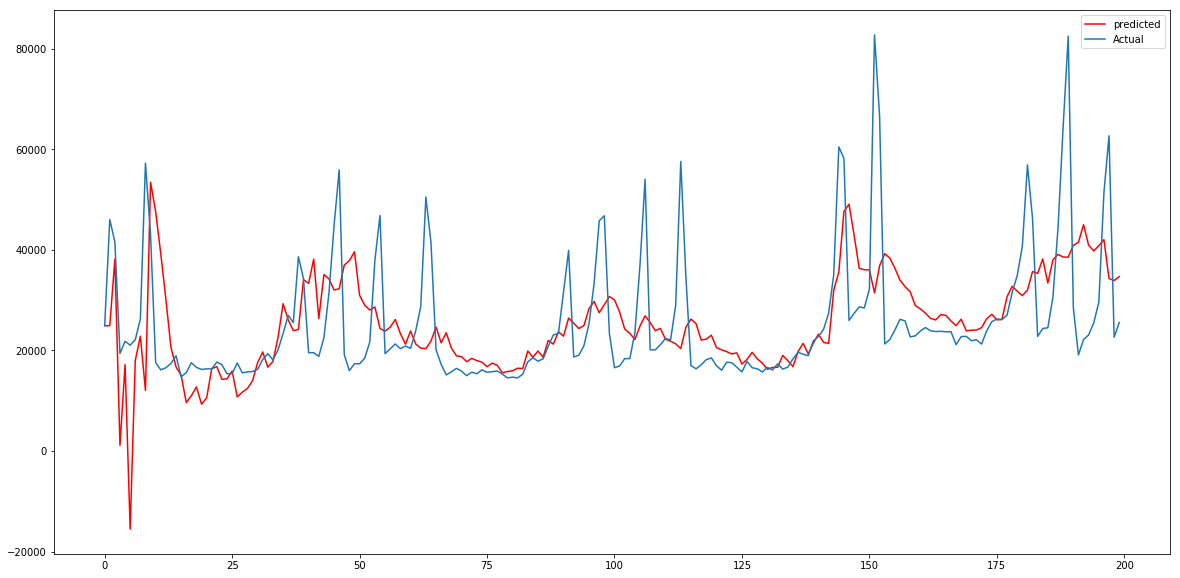

In [43]:
plt.figure(figsize=(20,10))
plt.plot(y_pred[:200],color='r', label='predicted')
plt.plot(Y[:200], label='Actual')
plt.legend()
plt.show()

In [44]:
linear.coef_

array([-1447.90681341,  -252.82444304,  -803.98664627, 11368.86870286])

In [45]:
linear.intercept_

40174.57583508536